In [38]:
#import analysis_util as au
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sys, os
from glob import glob
import pickle as pickle

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

sys.path.append("/localdata2/jent_so/LM_GenderBias")

In [39]:
def posneg(list):
    pos = [x for x in list if x>0]
    neg = [x for x in list if x<0]
    
#    print(len(pos), len(neg)) 
    return np.mean(pos), np.mean(neg), len(pos), len(neg)
    

def rename(name):
    specs = [
        ['N_pro', 'remove Pronouns'], 
        ['N_weat', 'remove WEAT'], 
        ['N_all', 'remove All'],
        ['mix_pro', 'mix Pronouns'], 
        ['mix_weat', 'mix WEAT'], 
        ['mix_all', 'mix All'], 
        ['original_Rall', 'All'], 
        ['original_Rweat', 'WEAT'], 
        ['original_Rpro', 'Pronouns'], 
    ]

    specs = [
        ['pro', 'remove Pronouns'], 
        ['weat', 'remove WEAT'], 
        ['all', 'remove All'],
        ['mix_pro', 'mix Pronouns'], 
        ['mix_weat', 'mix WEAT'], 
        ['mix_all', 'mix All'], 
        ['original_Rall', 'All'], 
        ['original_Rweat', 'WEAT'], 
        ['original_Rpro', 'Pronouns'], 
    ]
        #['original']
    for spec in specs:
        if spec[0] in name:
            return spec[1]
    print("error")


In [40]:
def calc_bias_dict(df_dict):
    bias_dict = {}

    for spec in df_dict.keys():
        bias_l = df_dict[spec].bias.tolist()
        # total bias
        overall_bias_total = np.mean(bias_l)
        overall_bias_total_noZero = np.mean([i for i in bias_l if i != 0])
        # absolute bias
        overall_bias_abs = np.mean([abs(x) for x in bias_l])
        overall_bias_abs_noZero = np.mean([abs(x) for x in bias_l if x != 0])
        # pos neg bias 
        pos, neg, pos_n, neg_n = posneg(bias_l) 

        bias_dict[spec] = [
            overall_bias_total, # 0
            overall_bias_abs, # 1
            pos, neg, # 2 3 
            pos_n, neg_n, # 4 5 
            overall_bias_total_noZero, # 6
            overall_bias_abs_noZero  ] # 7 
    return bias_dict

# 
---  
---  
---  
#    
---  
---  
---  
# 
---  
---  
---  
# 

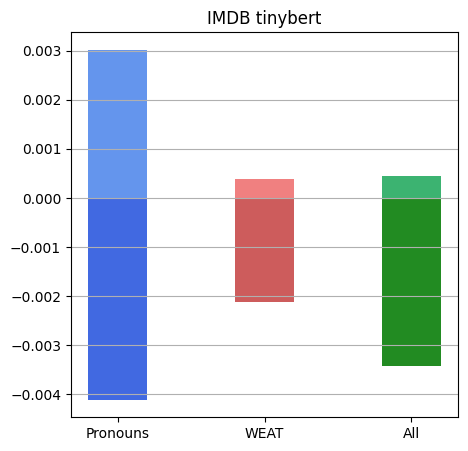

In [41]:
def twoSidedBias(task, model_id, 
                 # specs= ['N_pro', 'N_weat', 'N_all', 'mix_pro', 'mix_weat', 'mix_all', 'original'], 
                 safe_name=None, y_lim= None):
    
    files = glob("../res_results/ratings/*")
    #files.remove('../res_results/ratings/rating_{}_{}_original'.format(task, model_id))
    df_dict = {}
    for file in files: 
        if '_{}_'.format(model_id) in file and task in file:
            with open (file, "rb") as fh:
                data = pickle.load(fh)
            df_dict[rename(file)] = data
    
    plt.rcParams["figure.figsize"] = (5,5)
    
    bias_dict = calc_bias_dict(df_dict) 
    specs = list(df_dict.keys())
    
    specs.sort()
    
    myorder = [1,7,4,  2,8,5,  0,6,3 ]

    poss = [bias_dict[spec][2] for spec in specs] 
    negs = [bias_dict[spec][3] for spec in specs] 
    mids = [bias_dict[spec][7] for spec in specs] 
    
    # poss = [poss[i] for i in myorder]
    # negs = [negs[i] for i in myorder]
    # specs = [specs[i] for i in myorder]
    # mids = [mids[i] for i in myorder] 

  #  print(poss)
    c0 = 'tab:blue'
    c1 = 'tab:orange'

    x_pos = np.arange(len(poss)) + [0,1,2]
    
    if y_lim:
        plt.ylim(y_lim)
    
    # Create bars
    #plt.bar(x_pos, biases_abs)
    plt.bar(x_pos, poss, color=["cornflowerblue", "lightcoral", "mediumseagreen" ]*3)
    plt.bar(x_pos, negs, color=["royalblue","indianred",  'forestgreen']*3)
    plt.title('{} {}'.format(task, model_id))
    
    # Create names on the x-axis
    plt.xticks([x_pos[i] for i in [0,1,2]], ['Pronouns', "WEAT", "All"])
   # plt.xticks(rotation=90)
    
    # Show graphic
    plt.grid(axis='y')
    if safe_name:
        #plt.savefig("res_plots/{}_{}".format(safe_name, time() ) )
        plt.savefig("../res_plots/{}".format(safe_name))
    plt.show()

twoSidedBias('IMDB', 'tinybert',  safe_name='IMDB_TinyBert_Bias')
